In [77]:
import pandas as pd
import numpy as np

In [78]:
def predict(X, w, b):
    probs = predict_prop(X, w, b)
    return (probs >= 0.5).astype(int)

def predict_prop(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = predict_prop(X, w, b)
    cost = (-1/m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]

    f_wb = predict_prop(X, w, b)
    
    dj_dw = (1/m) * np.dot(X.T, (f_wb - y))
    dj_db = (1/m) * np.sum(f_wb - y)
    
    return dj_dw, dj_db

def gradient_descent(lr, x, y, w, b, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0
    cost_log = []
    iteration_log = []
    weight_log = []
    bias_log = []

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= (lr/m) * dj_dw
        b -= (lr/m) * dj_db

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
        #     if iters < 1001 and iters % 200 == 0 and iters > 1:
        #         cost_log.append(current_cost)
        #         iteration_log.append(iters)
        #         weight_log.append(w.flatten().tolist())  # Save as list
        #         bias_log.append(b)
        #     elif iters < 10000 and iters > 1001 and iters % 1000 == 0:
        #         cost_log.append(current_cost)
        #         iteration_log.append(iters)
        #         weight_log.append(w.flatten().tolist())  # Save as list
        #         bias_log.append(b)
        
        # if iters % 10000 == 0:
        #     cost_log.append(current_cost)
        #     iteration_log.append(iters)
        #     weight_log.append(w.flatten().tolist())  # Save as list
        #     bias_log.append(b)
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b #,cost_log , iteration_log , weight_log , bias_log

In [ ]:
# Load data
df = pd.read_csv("cleaned_titanic_data.csv")

# Separate features (X) and target (y)
X = df.drop('Survived', axis=1).values
y = df['Survived'].values.reshape(-1, 1)


# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2: 80/20 split
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
#mean = np.mean(X_train, axis=0)
#std = np.std(X_train, axis=0)

#X_train_scaled = (X_train - mean) / std
#X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0

In [80]:
wf, bf = gradient_descent(
    0.02,
    X_train,
    y_train,
    w,
    b,
    previous_cost=compute_cost(X_train, y_train, w, b),
    threshold=1e-5,
    max_iters=1000000
)


C:\Users\fahad\AppData\Local\Temp\ipykernel_36280\184707897.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
C:\Users\fahad\AppData\Local\Temp\ipykernel_36280\184707897.py:16: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))


Iteration 0 | Cost: nan | w: [-0.35583847 -0.57706036 -0.34501155 -0.76047817  0.78090225  0.18718319
  0.3582069   0.57834217 -0.00311487 -0.82615931] | b: 0.00000
Iteration 100 | Cost: nan | w: [-0.35550804 -0.57256349 -0.3456324  -0.76071863  0.76577996  0.18701352
  0.35843527  0.57831294 -0.00304154 -0.8261447 ] | b: 0.00006
Iteration 200 | Cost: nan | w: [-0.35515675 -0.5678108  -0.34624531 -0.76095347  0.75086809  0.18684849
  0.35866787  0.578286   -0.00296729 -0.82612444] | b: 0.00013
Iteration 300 | Cost: nan | w: [-0.35478559 -0.56281576 -0.34685064 -0.76118286  0.73615803  0.18668778
  0.35890458  0.57826123 -0.00289212 -0.82609884] | b: 0.00020
Iteration 400 | Cost: nan | w: [-0.35439554 -0.55759117 -0.34744881 -0.76140699  0.72164154  0.18653109
  0.35914529  0.57823853 -0.00281604 -0.82606822] | b: 0.00029
Iteration 500 | Cost: nan | w: [-0.35398756 -0.55214898 -0.34804022 -0.76162601  0.70731083  0.18637813
  0.35938986  0.5782178  -0.00273906 -0.82603285] | b: 0.00038


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_test = predict(X_test, wf, bf)  # Use your predict function


In [82]:

# Compute classification metrics
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

# Print results
print("\n📊 Classification Metrics (Test Set):")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)



📊 Classification Metrics (Test Set):
Accuracy       : 0.6328
Precision      : 0.6279
Recall         : 0.3553
F1 Score       : 0.4538
Confusion Matrix:
 [[85 16]
 [49 27]]


In [83]:
from sklearn.metrics import roc_auc_score

# Get probabilities (not class labels)
y_prob_test = predict_prop(X_test, wf, bf)

roc_auc = roc_auc_score(y_test, y_prob_test)
print(f"ROC AUC Score  : {roc_auc:.4f}")


ROC AUC Score  : 0.6337


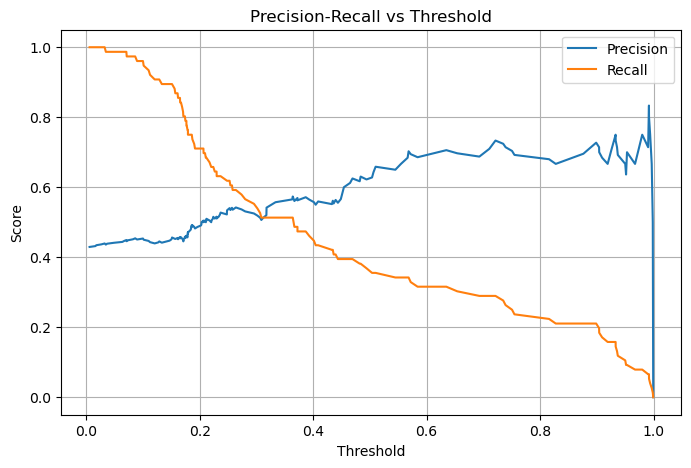

In [85]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_test_prob = predict_prop(X_test, wf, bf)

# Get precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_test)

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()
